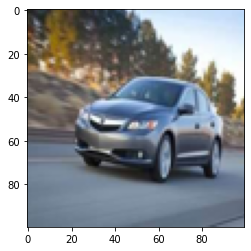

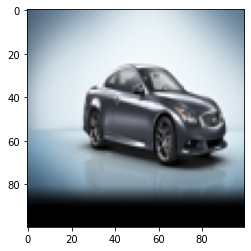

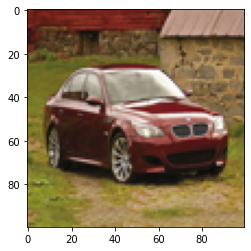

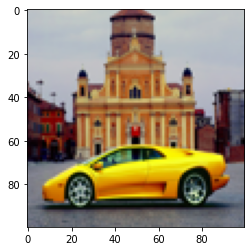

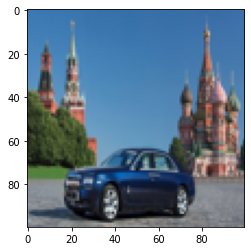

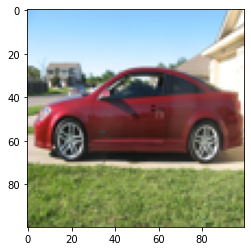

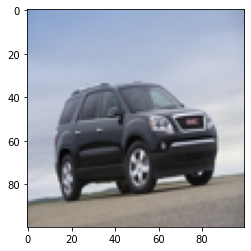

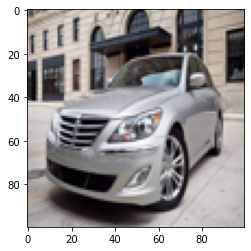

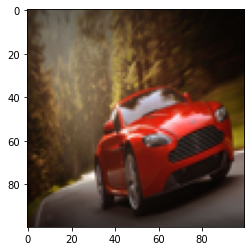

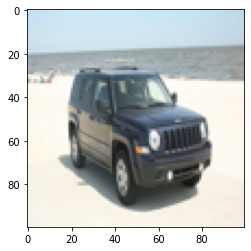

In [138]:
# 1) Read in all of the 10 images in python, resize each of them a 100 by 100 pixels format; 

from PIL import Image
from pylab import *
from matplotlib import pyplot as plt
import os
from os import listdir
import numpy as np
# get the path/directory
folder_dir = "C:/Users/rgkam/Desktop/ITM/IA2/image"
for images in os.listdir(folder_dir):
    image_path = os.path.join(folder_dir, images)   # read in the image
   # image = array(Image.open(image_path))
    image = Image.open(image_path)
    
    image = image.resize((100, 100))
    image_arr = np.array(image)
    plt.imshow(image_arr)  
    plt.show()



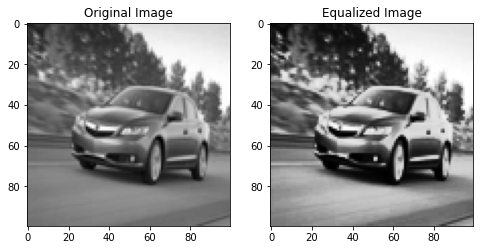

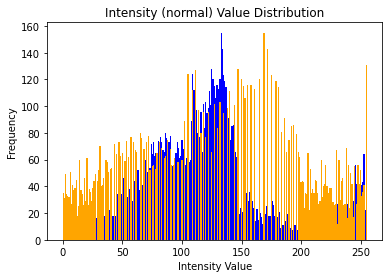

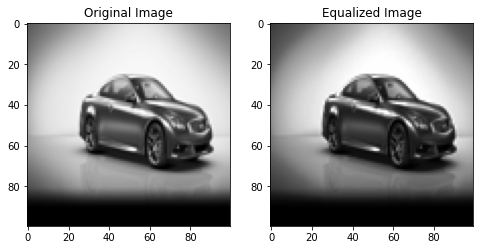

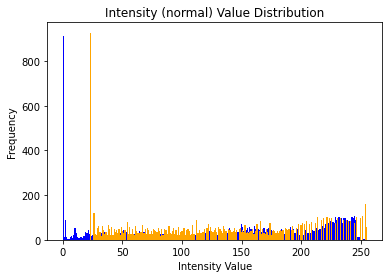

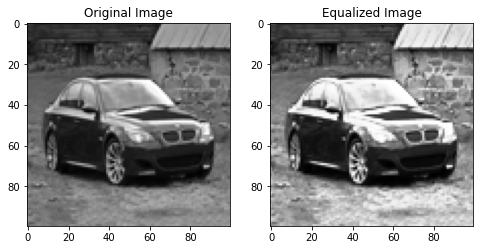

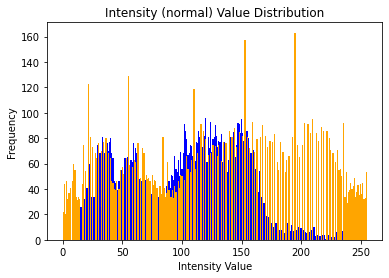

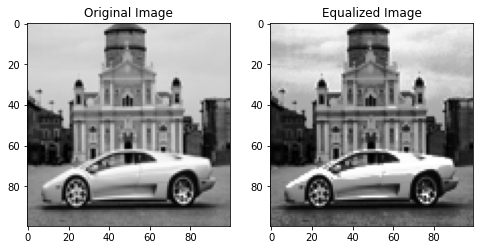

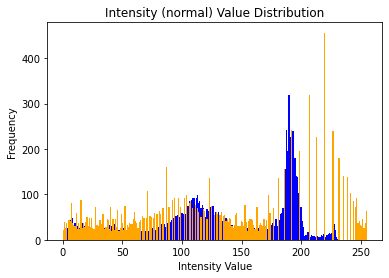

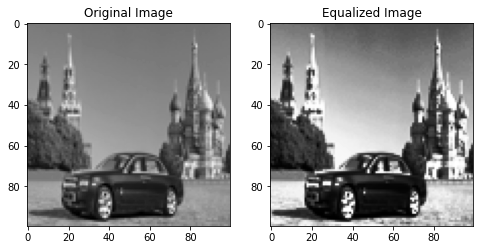

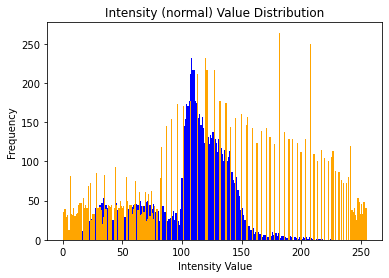

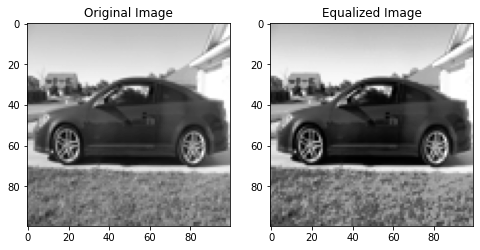

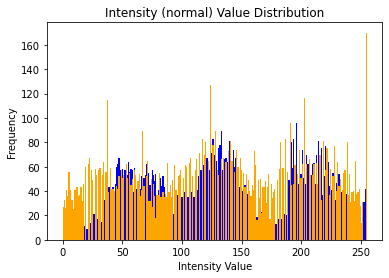

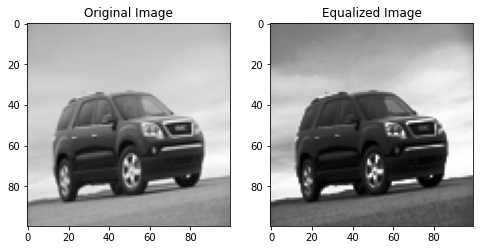

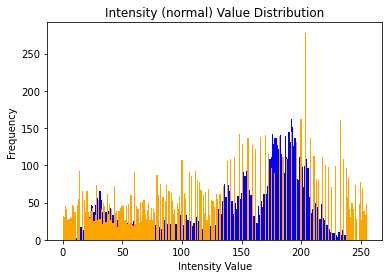

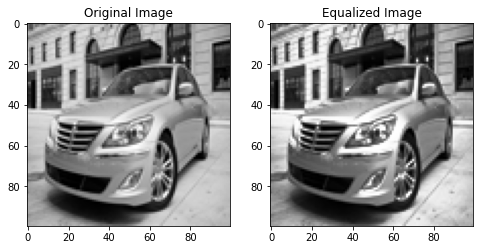

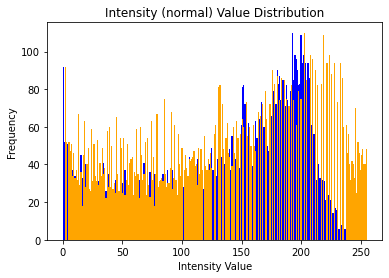

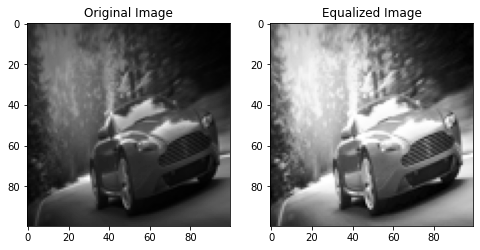

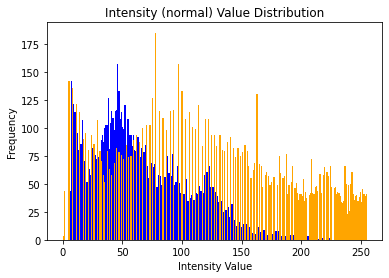

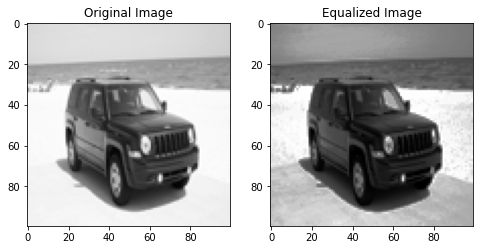

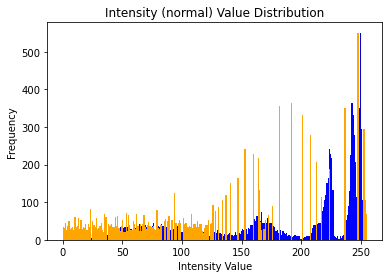

In [140]:
# 2.  Convert them to greyscale arrays (no color information needs to be kept, so the arrays will be 2‐D); 
# 3.  Flatten the 2‐D array to a 1‐D array (vectors), draw a histogram to present the intensity value 
# distribution of all of the images; 
# 4.  Conduct a histogram equalization to normalize the images, draw a histogram to present the 
# intensity value distribution of all of the images after the normalization; 

folder_dir = "C:/Users/rgkam/Desktop/ITM/IA2/image"

with open('Part2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for images in os.listdir(folder_dir):
        image_path = os.path.join(folder_dir, images)   # read in the image
        image = Image.open(image_path)
        
        image = image.resize((100, 100))
        
        image_gray = image.convert('L')
        image_gray = np.array(image_gray)         #converting to grayscale arrays

        image_flat = image_gray.flatten()
        writer.writerow(image_flat)

#         plt.imshow(image_gray, cmap='gray')
#         plt.show()

        imhist, bins = histogram(image_gray.flatten(), 256, density=True)
        cdf = imhist.cumsum()
        cdf = 255 * cdf / cdf[-1]
        im2 = interp(image_gray.flatten(), bins[:-1], cdf)
       # im_norm = im2(image_gray.flatten())
        im_norm = np.reshape(im2, image_gray.shape)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
        ax[0].imshow(image_gray, cmap='gray')
        ax[0].set_title('Original Image')
        ax[1].imshow(im_norm, cmap='gray')
        ax[1].set_title('Equalized Image')
        plt.show()
        
        plt.hist(image_flat, bins=256, range=(0, 255), color='blue')           #Before equalization
        plt.hist(im_norm.flatten(), bins=256, range=(0, 255), color='orange')   #After equalization
        plt.title("Intensity (normal) Value Distribution")
        plt.xlabel("Intensity Value")
        plt.ylabel("Frequency")
        plt.show()

5) Compare the histogram in step 4 with step 3, discuss what the difference is. 

Before histogram equalization, the intensity valus in the image seem to be concentrated in a narrow range, 
where as after equalization the values are spread out across the range resulting in higher contrast 
and better visibility of details when compared to original image.